In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn 

from torchvision import transforms, datasets
from matplotlib import pyplot as plt


In [3]:
training_data = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testing_data = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


3.3%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100.0%
13.9%

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100.0%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [4]:
training_dataset = torch.utils.data.DataLoader(training_data,batch_size=10,shuffle=True)
testing_dataset = torch.utils.data.DataLoader(testing_data,batch_size=10,shuffle=True)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

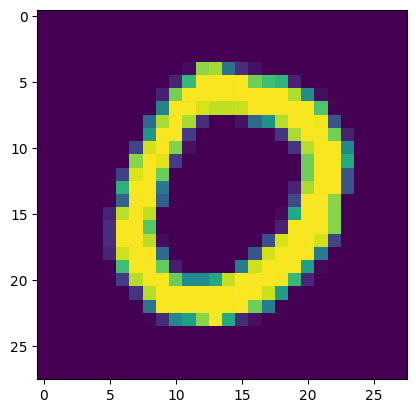

In [6]:
# print(len(training_dataset))

for t in training_dataset:
    print(t)
    break
plt.imshow(t[0][0].view(28,28))

In [ ]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcn = 


